In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [11]:
data = pd.read_csv("Merged_Data.csv")
data.head(5)

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,total-consumption,total-consumption-units,...,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude,0
0,2004-08-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
1,2004-08-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,IC,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
2,2002-11-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,,589.4,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
3,2002-11-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,589.4,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN
4,2004-07-01,54903,Adrian Energy Associates LLC,NG,Natural Gas,MI,Michigan,ALL,0.0,MMBtu per Mcf,...,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305.0,-83.9929,41.891,NaN


In [53]:

data['period'] = pd.to_datetime(data['period'])
data.sort_values(by='period', inplace=True)
plant_codes = data['plantCode'].unique()
data = data[data['period'] >= '2020-01-01']

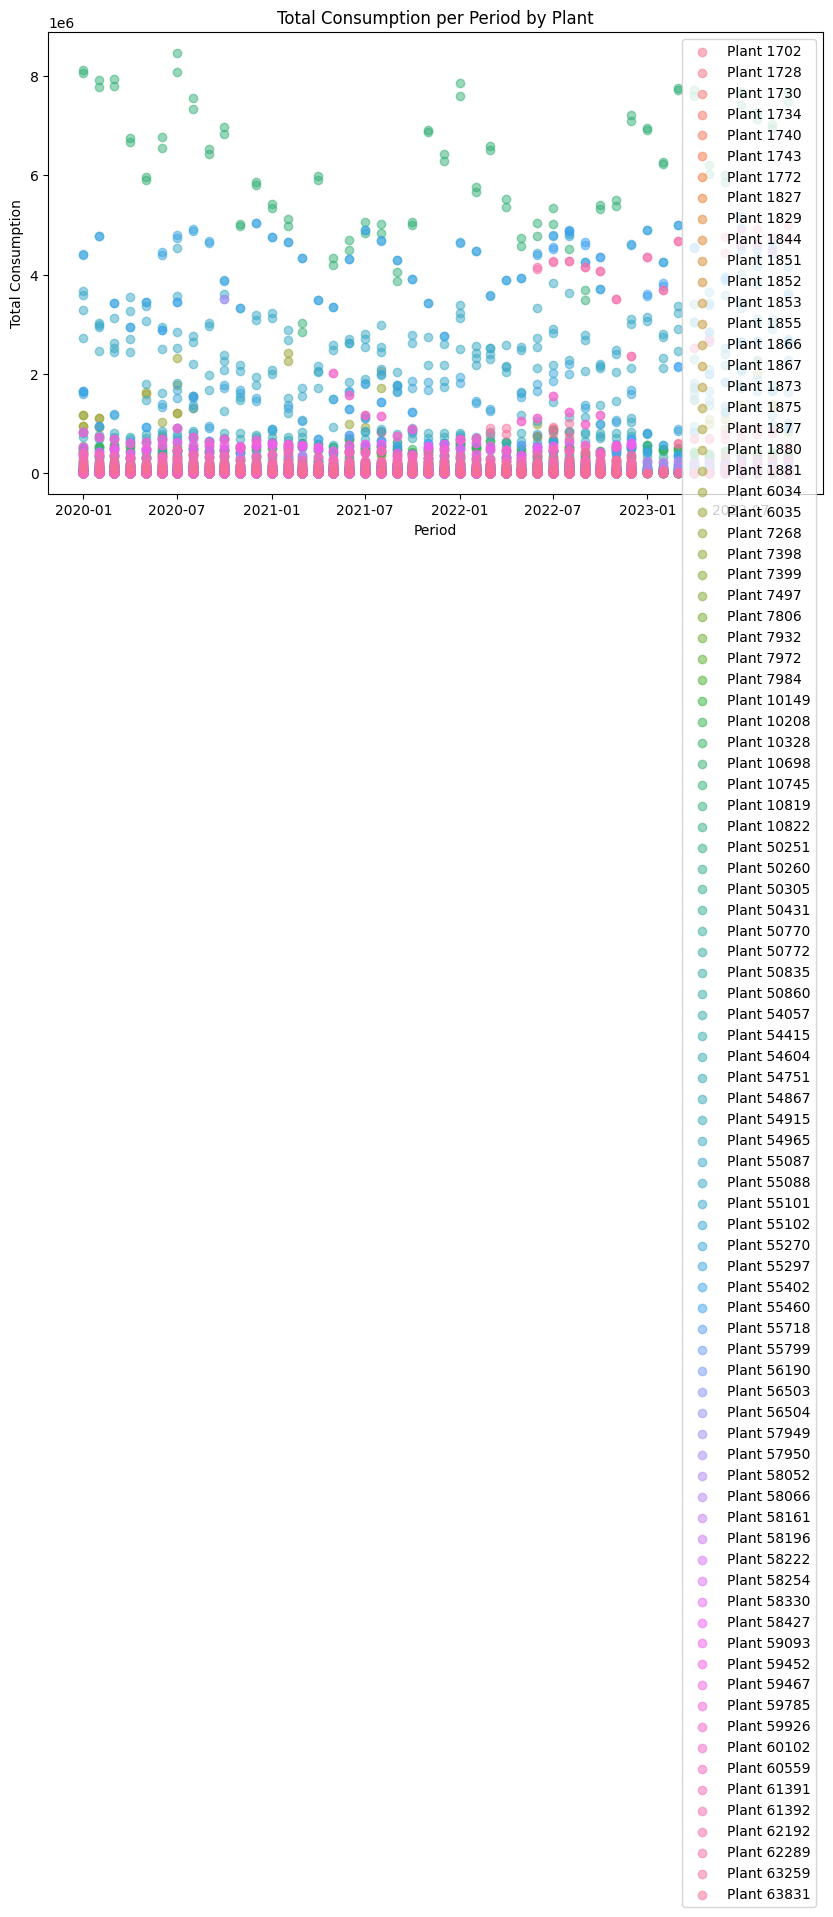

In [54]:

scatter_data = data[['plantCode', 'total-consumption','period']]

grouped_data = scatter_data.groupby('plantCode')['total-consumption'].sum()

palette = sns.color_palette("husl", n_colors=len(grouped_data))

# Scatterplot with different colors for each plant
plt.figure(figsize=(10, 6))
for plant, color in zip(grouped_data.index, palette):
    plant_data = scatter_data[scatter_data['plantCode'] == plant]
    plt.scatter(plant_data['period'], plant_data['total-consumption'], label=f'Plant {plant}', color=color, alpha=0.5)

plt.title('Total Consumption per Period by Plant')
plt.xlabel('Period')
plt.ylabel('Total Consumption')
plt.legend()
plt.show()


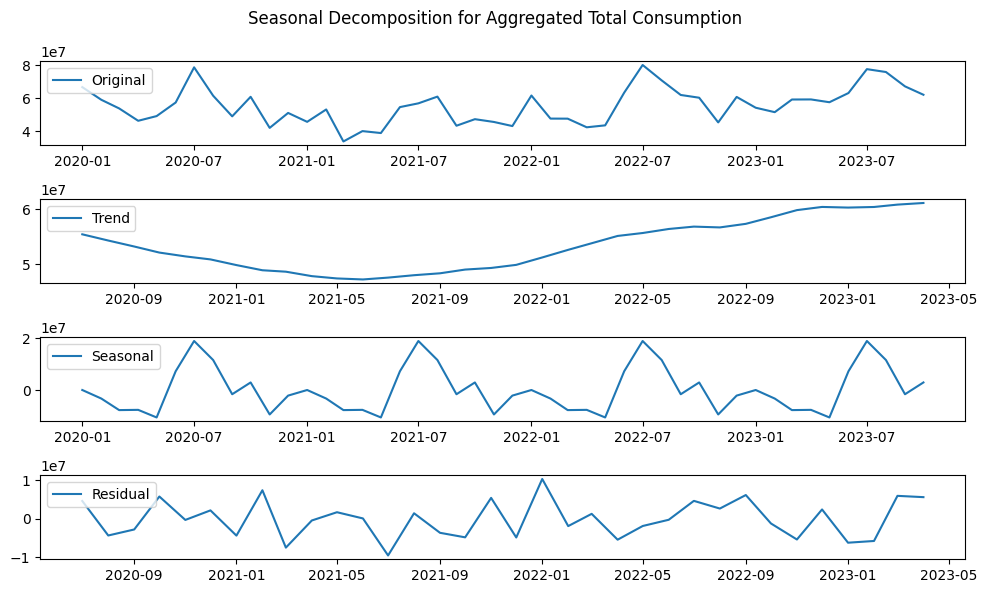

In [55]:
data['period'] = pd.to_datetime(data['period'])


aggregated_data = data.groupby('period')['total-consumption'].sum().reset_index()
aggregated_data.set_index('period', inplace=True)
result = seasonal_decompose(aggregated_data['total-consumption'], model='additive', period=12)


trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the decomposed components for aggregated total consumption
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(aggregated_data['total-consumption'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.suptitle("Seasonal Decomposition for Aggregated Total Consumption")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Add linear regression

In [ ]:
# Add kmeans analysis